In [1]:
import os
import pyfits
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
files=[item for item in os.listdir('data/B2.5/') if item.startswith('ALI')]

In [3]:
Ali_Sci_Images=[]
adinfo=[]
for i in files:
    n=pyfits.open('data/B2.5/'+i)
    Ali_Sci_Images+=[n[0].data]
    adinfo+=[np.loadtxt('info/'+i[:-5]+'.inf')] # info: 'Center_x_new','Center_y_new','Orientation'

In [4]:
era=np.median(Ali_Sci_Images, axis=0)

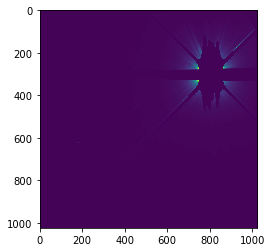

In [5]:
plt.imshow(era)

In [6]:
subs=[i-era for i in Ali_Sci_Images] 

In [7]:
maxw=1500

In [16]:
dst=np.zeros((maxw,maxw))
for ainf,sub in zip(adinfo,subs):
    canvas=np.zeros((maxw,maxw))
    canvas[maxw-len(sub):maxw,:len(sub)]=sub
    # info: 'Center_x_new','Center_y_new','Orientation'
    cx=int(ainf[0])
    cy=int(ainf[1]+maxw-len(sub))
    M = cv2.getRotationMatrix2D((cx,cy),ainf[2],1)
    dst += cv2.warpAffine(canvas,M,canvas.shape)/len(subs)

In [17]:
dst

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

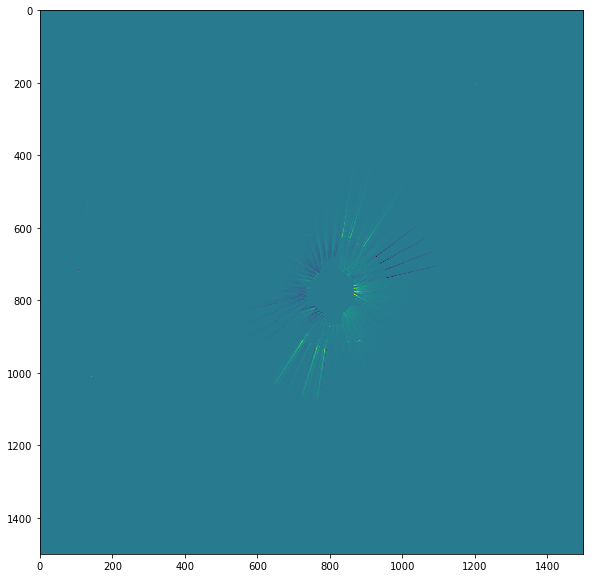

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(dst)

In [19]:
plt.imsave("disk.png",dst)

In [21]:
pyfits.writeto('rot_Ali_Sci.fits', dst)